<a href="https://colab.research.google.com/github/aman-garg0001/Indian-Cricketers-Face-Recognition/blob/main/Cricketers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cricketers Face Recognition**
# Phase 1: Training
## Importing necessary Libraries

In [ ]:
import os
import tensorflow as tf
import tensorflow.keras as keras
import cv2
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

## Loading dataset using ImageDataGenerator library

In [ ]:
path_to_train = '/content/drive/MyDrive/Cricketers Dataset/Train'
path_to_test = '/content/drive/MyDrive/Cricketers Dataset/Test'
batch_size = 32

In [ ]:
Generator = ImageDataGenerator()
train_generator = Generator.flow_from_directory(path_to_train, (224, 224), batch_size=batch_size)
validation_generator = Generator.flow_from_directory(path_to_test, (224, 224), batch_size=batch_size)

Found 313 images belonging to 15 classes.
Found 78 images belonging to 15 classes.


## Loading Pretrained VGGFace model with ResNet50 architecture

In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
mod = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

94699520/94694792 [==============================] - 2s 0us/step


## Fine tuning the loaded model

In [ ]:
last_layer = mod.get_layer('global_average_pooling2d_3')
last_output = last_layer.output
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(15, activation = 'sigmoid')(x)           

mode = Model(mod.input, x) 

mode.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.93):
      print("\nReached 99.0% accuracy so cancelling training!")
      self.model.stop_training = True

## Training the model with our dataset

In [ ]:
callback = myCallback()
mode.fit_generator(train_generator, epochs = 45, validation_data = validation_generator, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/45
10/10 [==============================] - 4s 364ms/step - loss: 0.0188 - acc: 0.9936 - val_loss: 0.5058 - val_acc: 0.9103
Epoch 2/45
10/10 [==============================] - 4s 364ms/step - loss: 0.0088 - acc: 0.9968 - val_loss: 0.6128 - val_acc: 0.9359

Reached 99.0% accuracy so cancelling training!


## Training set Accuracy = 99.68%
## Testing set Accuracy = 93.59%

## Saving tarined model into google drive as cric.h5

In [ ]:
model.save('cric.h5')

# Phase 2: Testing
## Importing necessary libraries

In [4]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
names = ['bhuvneshwar_kumar',
 'dinesh_karthik',
 'hardik_pandya',
 'jasprit_bumrah',
 'k._l._rahul',
 'kedar_jadhav',
 'kuldeep_yadav',
 'mohammed_shami',
 'ms_dhoni',
 'ravindra_jadeja',
 'rohit_sharma',
 'shikhar_dhawan',
 'vijay_shankar',
 'virat_kohli',
 'yuzvendra_chahal']

## Loading trained model saved in google drive

In [5]:
model = keras.models.load_model('/content/drive/MyDrive/Trained Models/cric.h5')

## Predicting on Images

## Part 1: Classifying which cricketer is in the input image

Prediction = virat_kohli


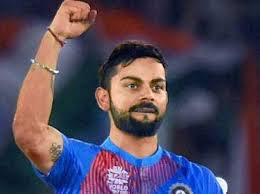

In [17]:
path = '/content/drive/MyDrive/Face_Recognition/front_face.xml' # name of file with XML tags
faceCascade = cv2.CascadeClassifier(path)
color = (255, 0, 0)
img = cv2.imread('/content/drive/MyDrive/Cricketers Dataset/Original Images/virat_kohli/6a93fc8fcc.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(20, 20)
    )
count = 0
for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        roi_color = cv2.resize(roi_color, (224, 224))
        roi_color = np.expand_dims(roi_color, axis=0)
        #print(roi_color.shape)
        result = model.predict(roi_color)
        ans = result.argmax(axis=-1)
        print("Prediction = " + names[ans[0]])
cv2_imshow(img)

## Part 2: Creating a bounding box around the face of cricketer

Prediction = virat_kohli


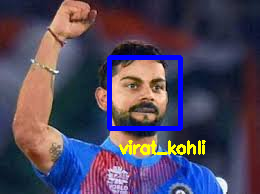

In [18]:
path = '/content/drive/MyDrive/Face_Recognition/front_face.xml' # name of file with XML tags
faceCascade = cv2.CascadeClassifier(path)
color = (255, 0, 0)
img = cv2.imread('/content/drive/MyDrive/Cricketers Dataset/Original Images/virat_kohli/6a93fc8fcc.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(20, 20)
    )
count = 0
for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        roi_color = cv2.resize(roi_color, (224, 224))
        roi_color = np.expand_dims(roi_color, axis=0)
        #print(roi_color.shape)
        result = model.predict(roi_color)
        ans = result.argmax(axis=-1)
        top_left = (x, y)
        bottom_right = (x+w, y+h)
        cv2.rectangle(img,top_left,bottom_right,color, 3)
        to_write = names[ans[0]]
        cv2.putText(img,to_write,(x+10,y+h+25),cv2.FONT_HERSHEY_SIMPLEX,0.55,(0,255,255),2)
        print("Prediction = " + names[ans[0]])
cv2_imshow(img)